**Problem Definition:**
    
**We are given data of the transactions occured using credit card and we are aimed to detect fradulant transaction by using this data so that in future this does not take place.
Our dataset**

**Have feature columns V1,V2...v28 some attribute .**

**Time-Time of transaction**

**Amount-Transited amount per transaction**

**Class is the Target Variable and it takes value 1 in case of fraud and 0 otherwise.**

In [74]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import autoplotter
from autoplotter import run_app
from PIL import Image
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
warnings.filterwarnings("ignore")

In [75]:
Fraud=pd.read_csv("creditcard.csv")
Fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


In [76]:
Fraud=Fraud.sample(n=100000,replace=False)

In [77]:
Fraud.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [78]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 65459 to 148046
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100000 non-null  float64
 1   V1      100000 non-null  float64
 2   V2      100000 non-null  float64
 3   V3      100000 non-null  float64
 4   V4      100000 non-null  float64
 5   V5      100000 non-null  float64
 6   V6      100000 non-null  float64
 7   V7      100000 non-null  float64
 8   V8      100000 non-null  float64
 9   V9      100000 non-null  float64
 10  V10     100000 non-null  float64
 11  V11     100000 non-null  float64
 12  V12     100000 non-null  float64
 13  V13     100000 non-null  float64
 14  V14     100000 non-null  float64
 15  V15     100000 non-null  float64
 16  V16     100000 non-null  float64
 17  V17     100000 non-null  float64
 18  V18     100000 non-null  float64
 19  V19     100000 non-null  float64
 20  V20     100000 non-null  float64
 21  V21   

In [79]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)
Fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,...,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000
mean,94715.26597,0.00661,0.00761,-0.00933,-0.00134,-0.00086,-0.00130,0.00144,-0.00037,0.00211,...,0.00148,-0.00055,-0.00152,-0.00078,-0.00029,0.00285,0.00029,0.00006,87.85038,0.00177
std,47468.41031,1.94810,1.60774,1.51570,1.40132,1.35544,1.32129,1.22808,1.21506,1.09746,...,0.74504,0.72441,0.61282,0.60495,0.51849,0.48438,0.39424,0.30584,237.17549,0.04203
min,0.00000,-46.85505,-45.60797,-33.68098,-5.68317,-42.14790,-19.99635,-43.55724,-50.68842,-13.43407,...,-22.79760,-8.88702,-44.80774,-2.78961,-10.29540,-1.65816,-8.87867,-9.61792,0.00000,0.00000
25%,54085.00000,-0.91868,-0.59471,-0.90133,-0.84225,-0.68399,-0.77262,-0.55124,-0.21009,-0.63774,...,-0.22728,-0.54340,-0.16167,-0.35525,-0.31631,-0.32593,-0.07110,-0.05311,5.55000,0.00000
50%,84618.00000,0.02712,0.06747,0.17183,-0.01549,-0.04961,-0.27594,0.04116,0.02159,-0.04948,...,-0.02911,0.00396,-0.01151,0.04050,0.01589,-0.04904,0.00107,0.01120,21.98000,0.00000
75%,139177.25000,1.31752,0.80888,1.01325,0.73466,0.61145,0.39579,0.57383,0.32656,0.60082,...,0.18696,0.52784,0.14670,0.43940,0.34948,0.24278,0.09063,0.07795,77.00000,0.00000
max,172792.00000,2.45493,22.05773,4.04047,13.12914,28.76267,23.91784,44.05446,19.16833,10.34841,...,27.20284,8.36199,19.00294,4.01444,5.85248,3.12275,12.15240,15.27065,10199.44000,1.00000


**Exploratory Data Analysis**

In [80]:
#run_app(Fraud,mode="inline")

In [81]:
#Fraud.groupby('Class').plot(kind="bar",color="orange")
#plt.show()

0    99823
1      177
Name: Class, dtype: int64


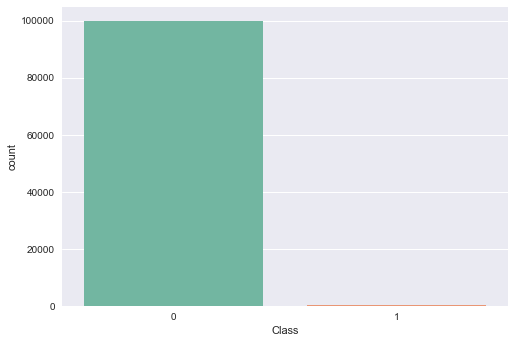

In [82]:
print(Fraud.Class.value_counts())
sns.countplot(Fraud.Class,palette='Set2')
plt.show()

In [83]:
Fraud.Amount.value_counts()

1.00000      4800
1.98000      2155
0.89000      1708
9.99000      1700
15.00000     1121
             ... 
159.29000       1
988.47000       1
159.71000       1
341.36000       1
254.55000       1
Name: Amount, Length: 18972, dtype: int64

**We see that the no of fraudulant transactions are very less (71) as compared to no of non-fraud transactions.**

**Actually this seems to be an imbalanced dataset.**

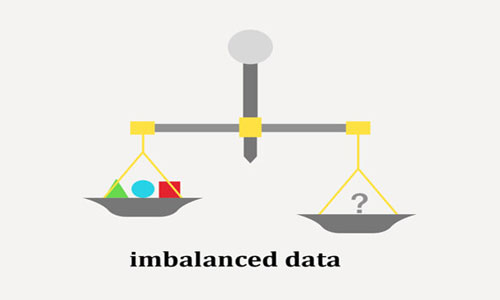

In [84]:
Image.open("imbalanced-data.jpg")

**Handilng Imbalanced Dataset with SMOTE in python**

**SMOTE (Synthetic Minority Oversampling Technique) – Oversampling**

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.

It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. 

These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. 

After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

**Firstly splitting the data to train and test**

In [85]:
X=Fraud.drop("Class",axis="columns")
y=Fraud["Class"]

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

Before SMOTE
0    79861
1      139
Name: Class, dtype: int64


<AxesSubplot:>

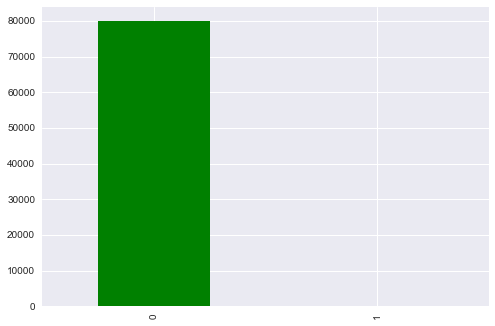

In [87]:
print("Before SMOTE")
print(y_train.value_counts())
y_train.value_counts().plot(kind="bar",color="Green")

In [88]:
smote=SMOTE(random_state=10,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE=smote.fit_resample(X_train,y_train)

After SMOTE
1    79861
0    79861
Name: Class, dtype: int64


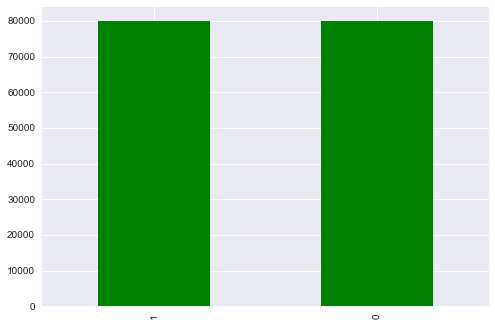

In [89]:
y_train_SMOTE.value_counts().plot(kind="bar",color="Green")
print("After SMOTE")
print(y_train_SMOTE.value_counts())


**As we can see that our dataset is balanced .** 

**Now let's proceed further and start building models.**

**Cross Validation**

**Using Cross validation Technique to see which Algorithm works well on the given Training Data set.From above results we can say Bagging Technique works well on the given training Dataset so we will use Bagging and logistric regression to test the model**

In [22]:
cv_Dtree=cross_val_score(DecisionTreeClassifier(),X_train_SMOTE,y_train_SMOTE,cv=5)
print(np.mean(cv_Dtree))

0.9985063351797209


In [18]:
cv_LogisR=cross_val_score(LogisticRegression(),X_train_SMOTE,y_train_SMOTE,cv=5)
print(np.mean(cv_LogisR))

0.9713343065773528


In [24]:
cv_KNN=cross_val_score(KNeighborsClassifier(),X_train_SMOTE,y_train_SMOTE,cv=5)
print(np.mean(cv_KNN))

In [26]:
#cv_Bagging=cross_val_score(BaggingClassifier(),X_train_SMOTE,y_train_SMOTE,cv=5)
#print(np.mean(cv_Bagging))

**Hyper Parameter Tuning**

In [36]:
rs=GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10),{'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]},cv=5)
rs.fit(X_train_SMOTE,y_train_SMOTE)
pd.DataFrame(rs.cv_results_)[['param_base_estimator__max_depth','param_max_samples','mean_test_score']]

,param_base_estimator__max_depth,param_max_samples,mean_test_score
0,1,0.05000,0.96047
1,1,0.10000,0.96006
2,1,0.20000,0.96027
3,1,0.50000,0.96010
4,2,0.05000,0.97291
5,2,0.10000,0.97354
6,2,0.20000,0.97224
7,2,0.50000,0.97135
8,3,0.05000,0.97963
9,3,0.10000,0.98098


**In the above we have used Hyper parameter tuning Technique GridsearchCv to find out the best parameters for the chosen model**

**Logistic Regression**

In [116]:
Lreg=LogisticRegression()
Lreg=Lreg.fit(X_train_SMOTE,y_train_SMOTE)

In [117]:
Lreg.coef_

array([[-2.95918204e-05, -4.28879915e-01,  3.74878635e-01,
        -6.99202474e-01,  4.30156824e-01, -2.90606217e-01,
        -1.26491183e-01, -5.65892110e-01,  1.50149349e-03,
        -2.47455064e-01, -5.61563133e-01,  3.58830864e-01,
        -5.93386567e-01, -1.00230591e-02, -6.61845580e-01,
        -1.63743751e-02, -3.86578556e-01, -6.08726046e-01,
        -2.03894081e-01,  6.31663417e-02,  4.05039996e-02,
         6.37662673e-02,  3.62513381e-03,  2.53225098e-03,
        -1.31865927e-02, -4.50425527e-03,  5.02869624e-03,
         9.15982003e-03,  8.41429883e-03, -2.52618027e-03]])

In [118]:
Lreg.intercept_

array([0.0049525])

In [119]:
y_train_predict=Lreg.predict(X_train_SMOTE)
y_test_predict=Lreg.predict(X_test)

In [120]:
pred_prob1=Lreg.predict_proba(X_test)

In [121]:
accuracy_score(y_test,y_test_predict)

0.9716

In [122]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [123]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])


print(auc_score1)

0.9517269507352152


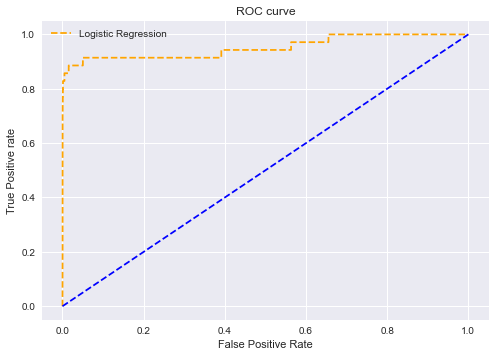

In [124]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Bagging Classifier**

In [125]:
Bagging=BaggingClassifier(n_estimators=10)
Bagging=Bagging.fit(X_train_SMOTE,y_train_SMOTE)

In [126]:
y_train_predict=Bagging.predict(X_train_SMOTE)
y_test_predict=Bagging.predict(X_test)

In [127]:
pred_prob2=Bagging.predict_proba(X_test)

In [129]:
accuracy_score(y_test,y_test_predict)

0.9996

In [130]:
cm=confusion_matrix(y_test,y_test_predict)

In [131]:
print(cm)

[[19959     6]
 [    2    33]]


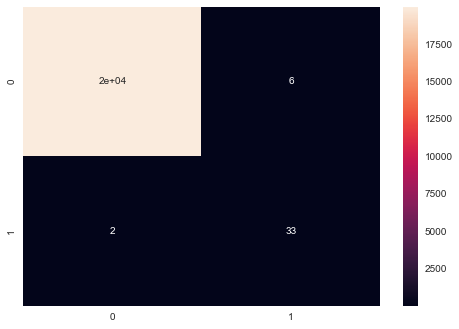

In [132]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)
sns.heatmap(cm,annot=True)
plt.show()

In [133]:
c=classification_report(y_test, y_test_predict)
print(c)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19965
           1       0.85      0.94      0.89        35

    accuracy                           1.00     20000
   macro avg       0.92      0.97      0.95     20000
weighted avg       1.00      1.00      1.00     20000



In [134]:
fpr_,tpr_,thres = roc_curve(y_test,pred_prob2[:,1],pos_label=None)
random=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random,pos_label=1)

In [135]:
roc_auc_score(y_test,pred_prob2[:,1])

0.9998218310615006

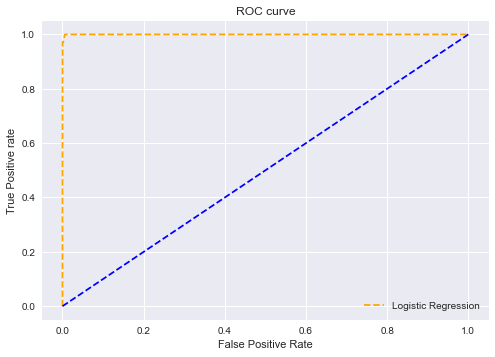

In [136]:
plt.plot(fpr_, tpr_, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC Ba',dpi=300)
plt.show();

In [148]:
THRESHOLD = [0.5]
j = np.where(Bagging.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
i=pd.DataFrame(data=[accuracy_score(y_test, j), recall_score(y_test, j),
                   precision_score(y_test, j), roc_auc_score(y_test, j)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])
print(i)

                    0
accuracy      0.99960
recall        0.94286
precision     0.84615
roc_auc_score 0.97128
